# Traffic signs detection project #
Section 3 of our project: Masks and AdaBoost.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

path_base = os.getcwd() + "\\databases"
train, test = np.load(os.path.join(path_base,'train.npy')), np.load(os.path.join(path_base,'test.npy'))
train = train.astype("float32") / 255
train = np.expand_dims(train, -1)
test = test.astype("float32") / 255
test = np.expand_dims(test, -1)

In [2]:
# Change array of pictures of size 45x45 to array of pictures 45*45=2025:
x1 = train
x1 = x1.astype("float32") / 255
rows, cols = (4170, 2025)
train = np.array([[0]*cols]*rows)
train = train.astype("float32")
jump = 0
for i in range(0,rows):
    for j in range(0, 45):
        for k in range(0, 45):
            train[i][jump] = x1[i][j][k]
            jump = jump + 1
    jump = 0


x2 = test
x2 = x2.astype("float32") / 255
rows, cols = (1998, 2025)
test = np.array([[0]*cols]*rows)
test = test.astype("float32")
jump = 0
for i in range(0,rows):
    for j in range(0, 45):
        for k in range(0, 45):
            test[i][jump] = x2[i][j][k]
            jump = jump + 1
    jump = 0

In [3]:
path_pict = os.getcwd() + "\\pictures"

f = open(path_pict + "\\TsignRecgTrain4170Annotation.txt", "r")
str = f.read()

lines = str.split("\n")
arr = []
for line in lines:
    arr.append(int(line.split(";")[7]))
    
Train_classes = []
for i in range(58):
    for k in range(arr.count(i)):
        Train_classes.append(i)

#get classification from file
path_pict = os.getcwd() + "\\pictures"

f = open(path_pict + "\\TsignRecgTest1994Annotation.txt", "r")
str = f.read()

lines = str.split("\n")
arr = []
for line in lines:
    arr.append(int(line.split(";")[7]))
    
Test_classes = []
for i in range(58):
    for k in range(arr.count(i)):
        Test_classes.append(i)

In [4]:
# A function that returns the name of the traffic sign, based in it's class
names = {
    0: '5-MPH',
    1: '15-MPH',
    2: '30-MPH',
    3: '40-MPH',
    4: '50-MPH',
    5: '60-MPH',
    6: '70-MPH',
    7: '80-MPH',
    8: 'Turn left/straight forbidden',
    9: 'Turn right/straight forbidden',
    10: 'Cannot go straight',
    11: 'Cannot turn left',
    12: 'Cannot turn right/left',
    13: 'Cannot turn right',
    14: 'Cannot bypass',
    15: 'Cannot do u-turn',
    16: 'No cars allowed',
    17: 'No music allowed',
    18: 'Black 40-MPH',
    19: 'Black 50-MPH',
    20: 'Can only go straight/right',
    21: 'Can only go straight',
    22: 'Can only turn left',
    23: 'Can only turn right/left',
    24: 'Can only turn right',
    25: 'Can only keep left',
    26: 'Can only keep right',
    27: 'A roundabout ahead',
    28: 'Cars allowed here',
    29: 'Music allowed here',
    30: 'Bicycle area',
    31: 'Can u-turn here',
    32: 'Split ahead',
    33: 'Traffic light ahead',
    34: 'Warning ahead',
    35: 'Warning: People crossing the road here',
    36: 'Warning: Bikes crossing the road here',
    37: 'Warning: Kids are playing around',
    38: 'Warning: Right foreclosure ahead',
    39: 'Warning: Left foreclosure ahead',
    40: 'Warning: Downhill',
    41: 'Warning: Uphill',
    42: 'Warning: Something Chinese ahead',
    43: 'Warning: Turn right',
    44: 'Warning: Turn left',
    45: 'Warning: Tree',
    46: 'Warning: Distorted road',
    47: 'Warning: Trains pass by',
    48: 'Warning: Road works ahead',
    49: 'Warning" Very Distorted road',
    50: 'Warning: Jail ahead',
    51: 'Warning: Bumping trucks ahead',
    52: 'Warning: Red Chinese ahead',
    53: 'No entrance from both sides',
    54: 'No parking allowed',
    55: 'No entrance',
    56: 'Something Chinese in a red-white triangle',
    57: 'Chinese no entrance',
}
def getNames(num):
    return names[num]

(array([ 265,  266,  267, ..., 2022, 2023, 2024], dtype=int64),)

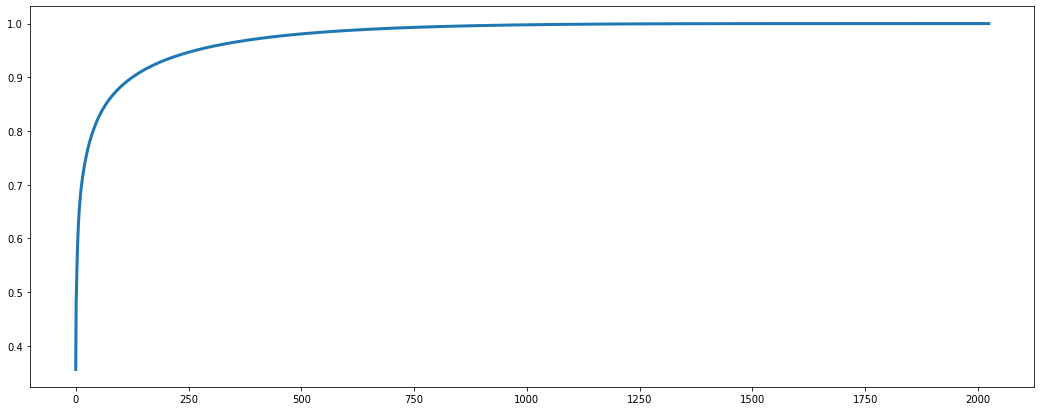

In [5]:
pca = PCA().fit(train)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)


In [7]:
target_names = []
for i in range(0, 58):
    target_names.append(getNames(i))

n_components = 265
SIZE = 45

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, train.shape[0])
)
pca = PCA(n_components=n_components).fit(train)
eigenfaces = pca.components_.reshape((n_components, SIZE, SIZE))
train_pca = pca.transform(train)
test_pca = pca.transform(test)

#Train the model:
#clf = AdaBoostClassifier(n_estimators=265, random_state=0).fit(train_pca, Train_classes)

#svc gets much better results
clf = SVC().fit(train_pca, Train_classes)

Extracting the top 265 eigenfaces from 4170 faces


In [8]:
print("Predicting traffic signs on the test set")
y_pred = clf.predict(test_pca)
print(classification_report(Test_classes, y_pred, target_names=target_names))

Predicting traffic signs on the test set
                                           precision    recall  f1-score   support

                                    5-MPH       0.32      0.86      0.46        14
                                   15-MPH       0.00      0.00      0.00        12
                                   30-MPH       0.00      0.00      0.00        60
                                   40-MPH       0.19      0.43      0.27        84
                                   50-MPH       0.33      0.38      0.35        58
                                   60-MPH       0.04      0.12      0.06        50
                                   70-MPH       0.00      0.00      0.00        30
                                   80-MPH       0.10      0.08      0.09        50
             Turn left/straight forbidden       1.00      0.71      0.83        14
            Turn right/straight forbidden       1.00      1.00      1.00         1
                       Cannot go straight    

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


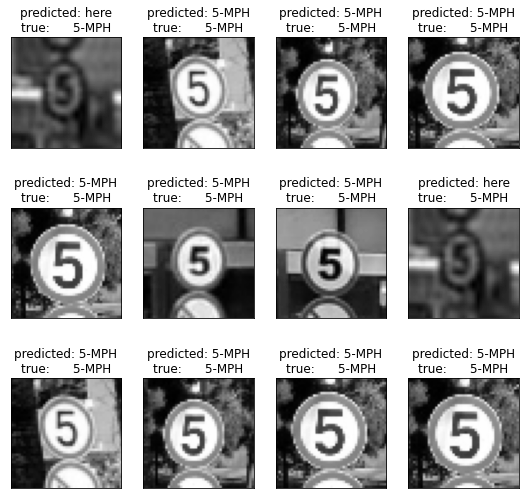

In [9]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

prediction_titles = [
    title(y_pred, Test_classes, target_names, i) for i in range(y_pred.shape[0])
]
 
plot_gallery(test, prediction_titles, SIZE, SIZE)

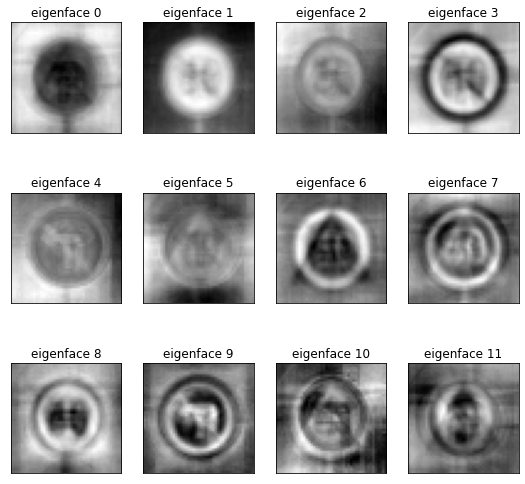

In [10]:
# Show the eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, SIZE, SIZE)
plt.show()

# Next file contains Neural Network use.